In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import os

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        print(path)

/kaggle/input/national-universities-rankings-explore-quality-t/National Universities Rankings.csv


In [3]:
df = pd.read_csv(path)
df.head()

,index,Name,Location,Rank,Description,Tuition and fees,In-state,Undergrad Enrollment
0,0,Princeton University,"Princeton, NJ",1,"Princeton, the fourth-oldest college in the Un...","$45,320",NaN,"5,402"
1,1,Harvard University,"Cambridge, MA",2,"Harvard is located in Cambridge, Massachusetts...","$47,074",NaN,"6,699"
2,2,University of Chicago,"Chicago, IL",3,"The University of Chicago, situated in Chicago...","$52,491",NaN,"5,844"
3,3,Yale University,"New Haven, CT",3,"Yale University, located in New Haven, Connect...","$49,480",NaN,"5,532"
4,4,Columbia University,"New York, NY",5,"Columbia University, located in Manhattan's Mo...","$55,056",NaN,"6,102"


In [4]:
df.dtypes

index                    int64
Name                    object
Location                object
Rank                     int64
Description             object
Tuition and fees        object
In-state                object
Undergrad Enrollment    object
dtype: object

In [5]:
new_df = df.drop(columns=["In-state","Description", "index"])
new_df.columns = ["name", "loc", "rank", "tuition", "enrollment"]
new_df["tuition"] = new_df["tuition"].str.replace(r'\D+','', regex=True).astype(int)
new_df["enrollment"] = new_df["enrollment"].str.replace(r'\D+','', regex=True).astype(int)
new_df["loc"] = new_df["loc"].str.slice(-2)
new_df.sort_values("rank", axis=0, inplace=True)

In [6]:
def detect_outliers(series):
    # Calculate the interquartile range (IQR)
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    
    # Identify the rows that contain outliers
    outlier_rows = series[~((series >= (Q1 - 1. * IQR)) & (series <= (Q3 + 1. * IQR)))]
    
    # Return the outliers
    return outlier_rows.index

rows = detect_outliers(new_df["tuition"])
new_df.loc[rows]

,name,loc,rank,tuition,enrollment
67,Brigham Young University--Provo,UT,68,5300,30221


In [7]:
new_df.drop(rows, inplace=True)

In [8]:
new_df.head()

,name,loc,rank,tuition,enrollment
0,Princeton University,NJ,1,45320,5402
1,Harvard University,MA,2,47074,6699
2,University of Chicago,IL,3,52491,5844
3,Yale University,CT,3,49480,5532
4,Columbia University,NY,5,55056,6102


In [9]:
new_df.corr()

,rank,tuition,enrollment
rank,1.000000,-0.735247,-0.036580
tuition,-0.735247,1.000000,-0.376859
enrollment,-0.036580,-0.376859,1.000000


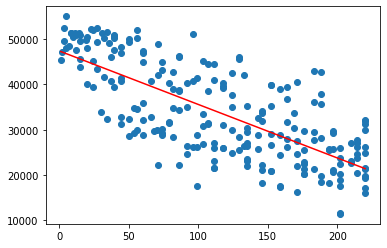

In [10]:
model = Pipeline([
    ("scaler", MinMaxScaler()),
    ("regressor", LinearRegression())
])
X = new_df["rank"].values
Y = new_df["tuition"].values
result = model.fit(X.reshape(-1,1), Y.reshape(-1,1))
Y_pred = model.predict(X.reshape(-1,1))
plt.scatter(X, Y)
plt.plot(X, Y_pred, color="red")

In [11]:
result["regressor"].coef_, result["regressor"].intercept_

(array([[-25867.71841635]]), array([47261.86559092]))